In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

# 1000 songs df 

In [3]:
df_audio1000 = pd.read_csv(r'df_audio_features_1000.csv')
df_audio1000 # see what to drop
# Drop columns with shitty DataTypes:
df_audio1000 ['title'] = df_audio1000['name'] + ' - ' + df_audio1000['artist']
df_1000 = df_audio1000[['title','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','time_signature','valence','tempo']]
df_1000.set_index('title', inplace=True)
df_1000

danceability   energy  \
title                                                                       
All Shook Up - Elvis Presley                              0.6240  0.46800   
I've Got You Under My Skin - Remastered 1998 - ...        0.5850  0.24700   
Smoke Gets In Your Eyes - The Platters                    0.2900  0.22700   
What'd I Say, Pt. 1 & 2 - Ray Charles                     0.5400  0.68100   
Dream A Little Dream Of Me - Ella Fitzgerald              0.4550  0.16700   
...                                                          ...      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ...        0.2020  0.06940   
Winter Fragments pour ensemble instrumental, so...        0.1880  0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...        0.0596  0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...        0.1330  0.02080   
Ravel: Boléro, M. 81 - Maurice Ravel                      0.3540  0.04870   

                                                    key  loudness  mode  \
title                                                                     
All Shook Up - Elvis Presley                         10   -12.162     1   
I've Got You Under My Skin - Remastered 1998 - ...    1   -12.612     1   
Smoke Gets In Your Eyes - The Platters                3   -13.060     1   
What'd I Say, Pt. 1 & 2 - Ray Charles                 4    -5.440     1   
Dream A Little Dream Of Me - Ella Fitzgerald          0   -13.613     1   
...                                                 ...       ...   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ...    3   -23.390     1   
Winter Fragments pour ensemble instrumental, so...    6   -21.873     1   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...    9   -42.959     1   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...    4   -29.443     1   
Ravel: Boléro, M. 81 - Maurice Ravel                  5   -24.568     1   

                                                    speechiness  acousticness  \
title                                                                           
All Shook Up - Elvis Presley                             0.1320         0.881   
I've Got You Under My Skin - Remastered 1998 - ...       0.0400         0.452   
Smoke Gets In Your Eyes - The Platters                   0.0311         0.944   
What'd I Say, Pt. 1 & 2 - Ray Charles                    0.0508         0.808   
Dream A Little Dream Of Me - Ella Fitzgerald             0.0739         0.918   
...                                                         ...           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ...       0.0473         0.917   
Winter Fragments pour ensemble instrumental, so...       0.0442         0.855   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...       0.0434         0.951   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...       0.0419         0.883   
Ravel: Boléro, M. 81 - Maurice Ravel                     0.0323         0.783   

                                                    instrumentalness  \
title                                                                  
All Shook Up - Elvis Presley                                0.000006   
I've Got You Under My Skin - Remastered 1998 - ...          0.000009   
Smoke Gets In Your Eyes - The Platters                      0.000079   
What'd I Say, Pt. 1 & 2 - Ray Charles                       0.000000   
Dream A Little Dream Of Me - Ella Fitzgerald                0.000000   
...                                                              ...   
1812 Festival Overture, Op. 49: 1812 Overture, ...          0.715000   
Winter Fragments pour ensemble instrumental, so...          0.426000   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...          0.969000   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...          0.505000   
Ravel: Boléro, M. 81 - Maurice Ravel                        0.484000   

                                                    liveness  time_signature  \
tit

Let's quickly recreate our heatmap from 10 songs.

In [16]:
# Making the DataFrame for the heatmap excluding age
#song10_df = pd.DataFrame(pairwise_distances(df_10), index=df_10.index, columns=df_10.index)

In [75]:
 pip install scikit-learn  --upgrade

Note: you may need to restart the kernel to use updated packages.


# Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between.

newValue=oldValue−min(column)max(column)−min(column)

In [4]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Create DataFrame of MinMax scaled values
my_scaler = MinMaxScaler().set_output(transform='pandas')
min_max_df = my_scaler.fit_transform(df_1000)

# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': df_1000.iloc[:,1], 
    'min_max_scale': min_max_df.iloc[:,1]
}).sort_values(by='original')

original  min_max_scale
title                                                                      
Track3a (2waynice) - Keith Fullerton Whitman        0.000020       0.000000
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...  0.000930       0.000913
Photo With Grey Sky, White Clouds - Jonny Nash      0.000985       0.000969
The Unanswered Question - Charles Ives              0.001080       0.001064
The Unquestioned Answer - Laurie Spiegel            0.001340       0.001325
...                                                      ...            ...
Raining Blood - Slayer                              0.995000       0.998996
Barcelona (In the Style of D Kay & Epsilon & St...  0.995000       0.998996
L'enfant sauvage - Gojira                           0.995000       0.998996
Wait and Bleed - Slipknot                           0.996000       1.000000
Under and Over It - Five Finger Death Punch         0.996000       1.000000

[1440 rows x 2 columns]

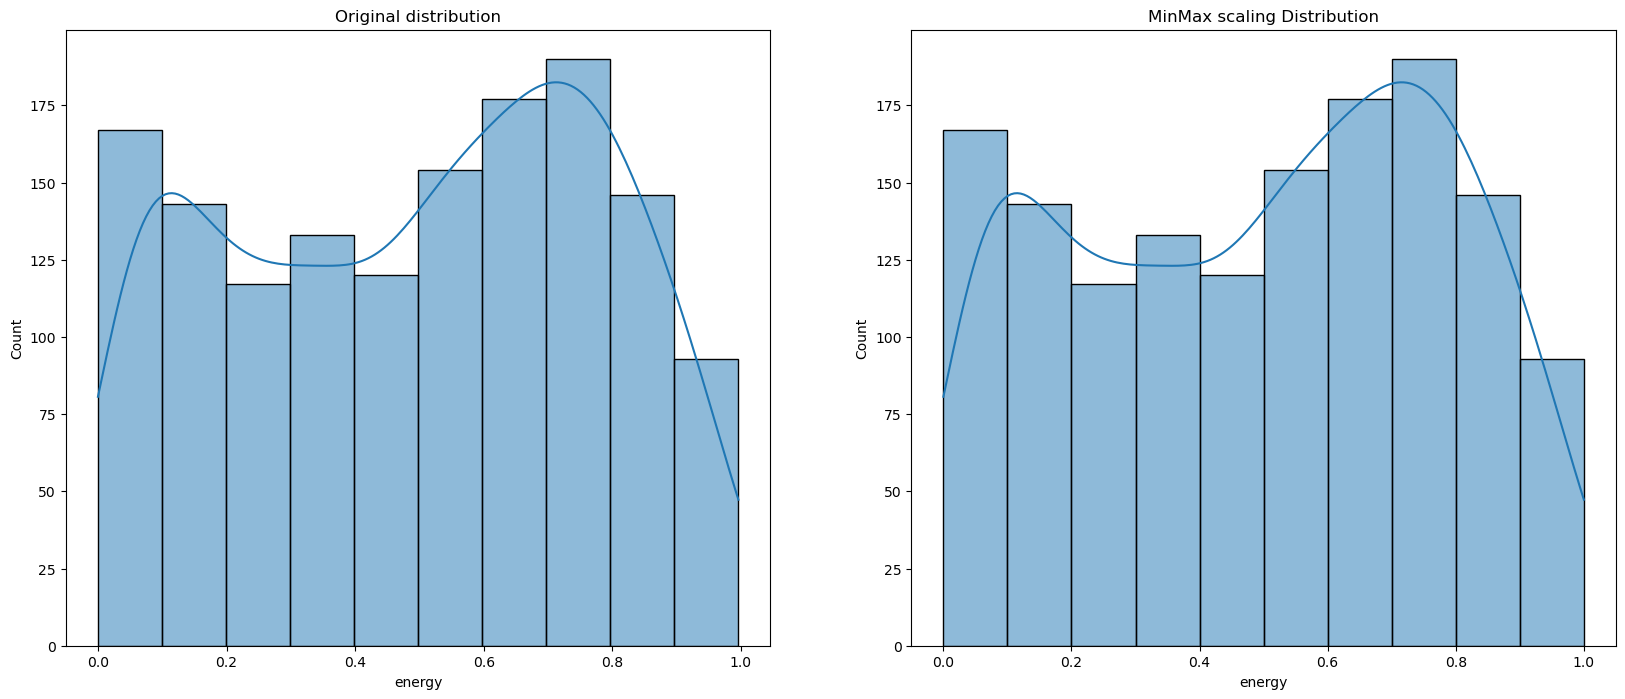

In [5]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_1000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(min_max_df.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('MinMax scaling Distribution')

plt.show()

Let's have a look at the affect MinMax scaling had on the heatmap

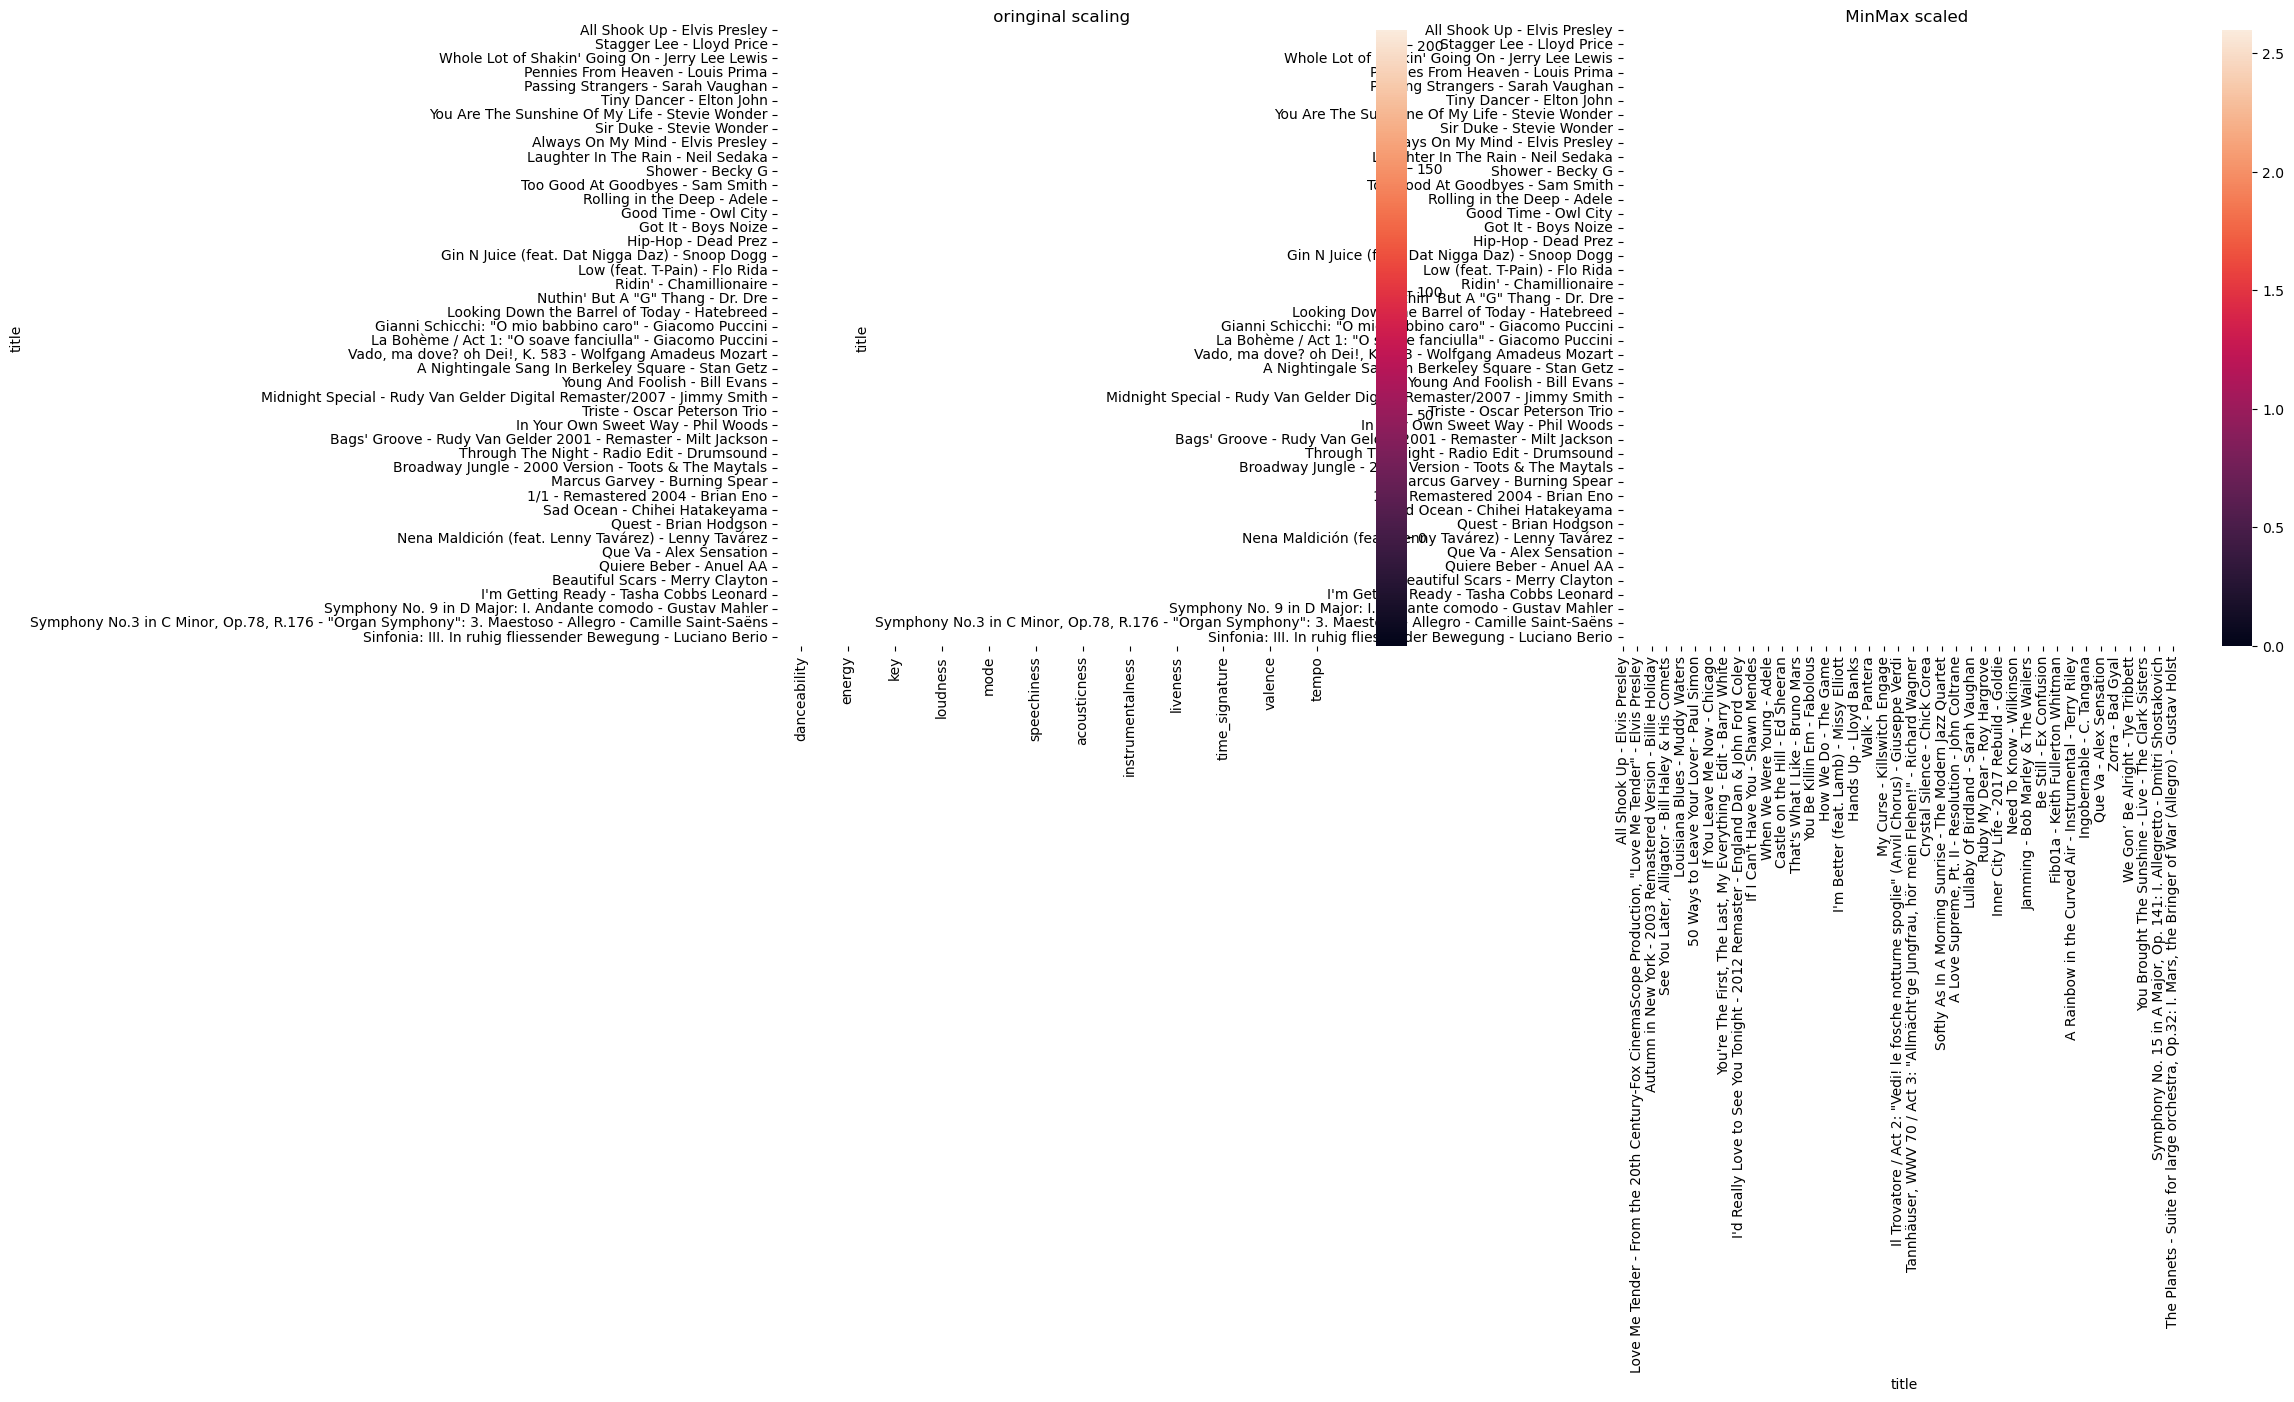

In [6]:
# # Making the DataFrame for the MinMaxed heatmap
# minmax_distances = pd.DataFrame(pairwise_distances(min_max_df), index=df_1000.index, columns=df_1000.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_1000, ax=ax1, linewidths=.2);
# sns.heatmap(minmax_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title(' oringinal scaling')
# ax2.set_title(' MinMax scaled')

# plt.show()

# Standard scaler
All of the columns get scaled according to the standard deviation of the column. The standard deviation equals one, and all other values get scaled accordingly. In addition to this the data gets centered around 0 as the mean. This means that the mean becomes 0 and, therefore, all values less than the mean will be negative, and all values higher than the mean will be positive.

newValue=oldValue−mean(column)std(column) 

Let's have a look at how this affects the age column:

In [7]:
df_1000.describe()

danceability       energy          key     loudness         mode  \
count   1440.000000  1440.000000  1440.000000  1440.000000  1440.000000   
mean       0.538917     0.494241     5.154861   -11.098032     0.663194   
std        0.219193     0.281917     3.540932     6.979107     0.472782   
min        0.059600     0.000020     0.000000   -44.406000     0.000000   
25%        0.386000     0.243000     2.000000   -14.927250     0.000000   
50%        0.562000     0.529500     5.000000    -8.939500     1.000000   
75%        0.710250     0.733000     8.000000    -5.677250     1.000000   
max        0.964000     0.996000    11.000000     1.085000     1.000000   

       speechiness  acousticness  instrumentalness     liveness  \
count  1440.000000   1440.000000       1440.000000  1440.000000   
mean      0.086273      0.469774          0.188482     0.174391   
std       0.086193      0.374637          0.336594     0.146007   
min       0.023200      0.000002          0.000000     0.020700   
25%       0.038400      0.083025          0.000000     0.090700   
50%       0.048200      0.419000          0.000127     0.118000   
75%       0.088825      0.869250          0.159750     0.203000   
max       0.576000      0.996000          0.985000     0.985000   

       time_signature      valence        tempo  
count     1440.000000  1440.000000  1440.000000  
mean         3.889583     0.472576   115.249066  
std          0.446937     0.287807    31.611805  
min          1.000000     0.019600    49.689000  
25%          4.000000     0.214750    91.014250  
50%          4.000000     0.476500   110.008000  
75%          4.000000     0.720000   135.587000  
max          5.000000     0.985000   206.313000

In [8]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Create DataFrame of Standar scaled values
my_scaler = StandardScaler().set_output(transform='pandas')
standard_df = my_scaler.fit_transform(df_1000)

# Display age column of original DataFrame and age column of MinMaStandard scaledxed DataFrame to compare
pd.DataFrame({
    'original': df_1000.iloc[:,1], 
    'standard_scale': standard_df.iloc[:,1]
}).sort_values(by='original')

original  standard_scale
title                                                                       
Track3a (2waynice) - Keith Fullerton Whitman        0.000020       -1.753679
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...  0.000930       -1.750451
Photo With Grey Sky, White Clouds - Jonny Nash      0.000985       -1.750256
The Unanswered Question - Charles Ives              0.001080       -1.749919
The Unquestioned Answer - Laurie Spiegel            0.001340       -1.748996
...                                                      ...             ...
Raining Blood - Slayer                              0.995000        1.776881
Barcelona (In the Style of D Kay & Epsilon & St...  0.995000        1.776881
L'enfant sauvage - Gojira                           0.995000        1.776881
Wait and Bleed - Slipknot                           0.996000        1.780429
Under and Over It - Five Finger Death Punch         0.996000        1.780429

[1440 rows x 2 columns]

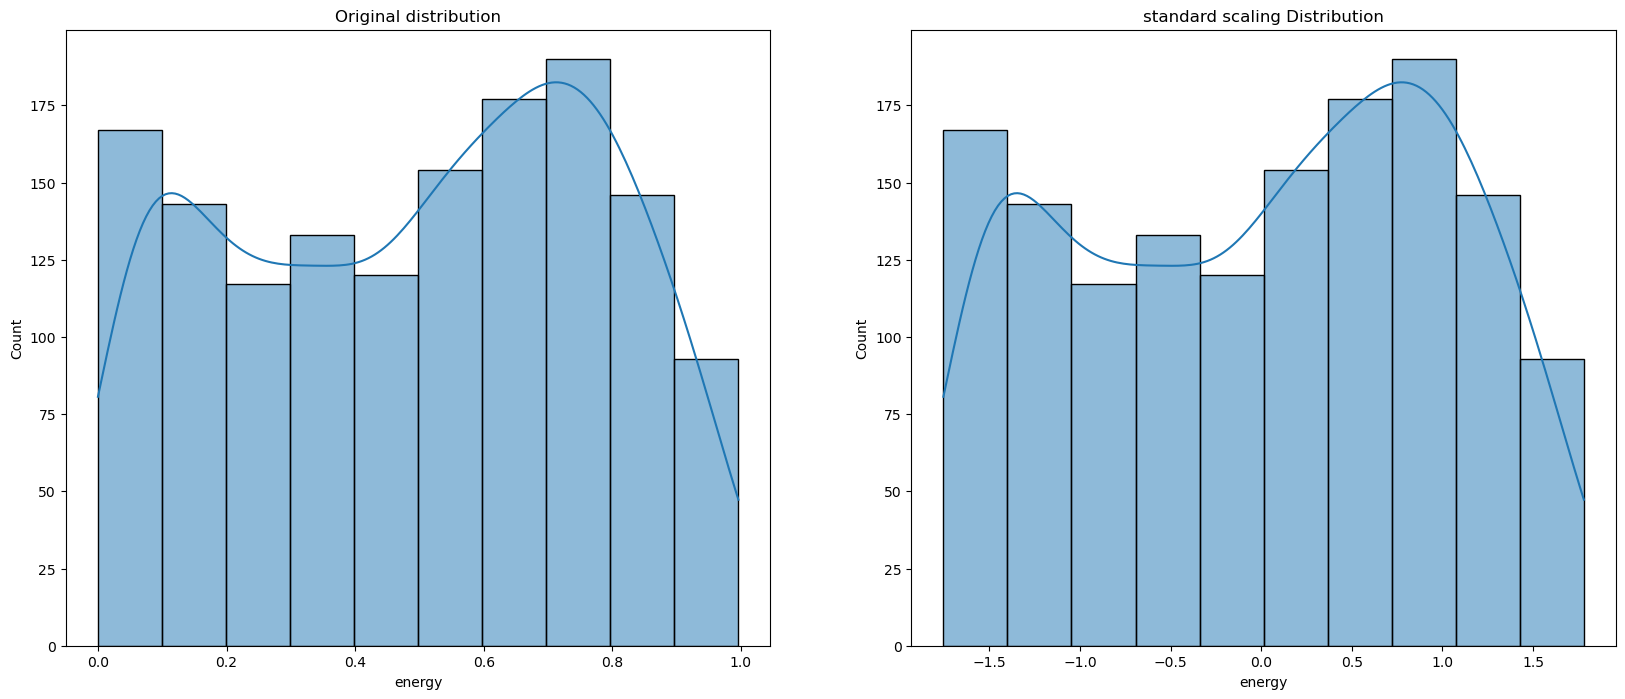

In [10]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_1000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(standard_df.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('standard scaling Distribution')

plt.show()

In [11]:
standard_df.describe()

danceability        energy           key      loudness          mode  \
count  1.440000e+03  1.440000e+03  1.440000e+03  1.440000e+03  1.440000e+03   
mean   1.927471e-18 -2.701543e-16  1.623605e-16  1.503427e-16 -2.388521e-16   
std    1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00   
min   -2.187493e+00 -1.753679e+00 -1.456298e+00 -4.774183e+00 -1.403236e+00   
25%   -6.978785e-01 -8.914961e-01 -8.912787e-01 -5.488593e-01 -1.403236e+00   
50%    1.053451e-01  1.251129e-01 -4.374976e-02  3.093923e-01  7.126383e-01   
75%    7.819241e-01  8.472069e-01  8.037792e-01  7.769855e-01  7.126383e-01   
max    1.939981e+00  1.780429e+00  1.651308e+00  1.746250e+00  7.126383e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  1.440000e+03  1.440000e+03      1.440000e+03  1.440000e+03   
mean  -3.662194e-17 -2.289835e-17      1.686845e-15 -1.770189e-16   
std    1.000347e+00  1.000347e+00      1.000347e+00  1.000347e+00   
min   -7.320242e-01 -1.254375e+00     -5.601629e-01 -1.052997e+00   
25%   -5.556136e-01 -1.032690e+00     -5.601629e-01 -5.733996e-01   
50%   -4.418752e-01 -1.355758e-01     -5.597855e-01 -3.863568e-01   
75%    2.961696e-02  1.066673e+00     -8.539028e-02  1.960110e-01   
max    5.683751e+00  1.405118e+00      2.367230e+00  5.553795e+00   

       time_signature       valence         tempo  
count    1.440000e+03  1.440000e+03  1.440000e+03  
mean    -1.924541e-15 -3.531126e-17 -1.586694e-16  
std      1.000347e+00  1.000347e+00  1.000347e+00  
min     -6.467554e+00 -1.574433e+00 -2.074631e+00  
25%      2.471380e-01 -8.961395e-01 -7.669045e-01  
50%      2.471380e-01  1.363969e-02 -1.658522e-01  
75%      2.471380e-01  8.599864e-01  6.435887e-01  
max      2.485368e+00  1.781062e+00  2.881695e+00

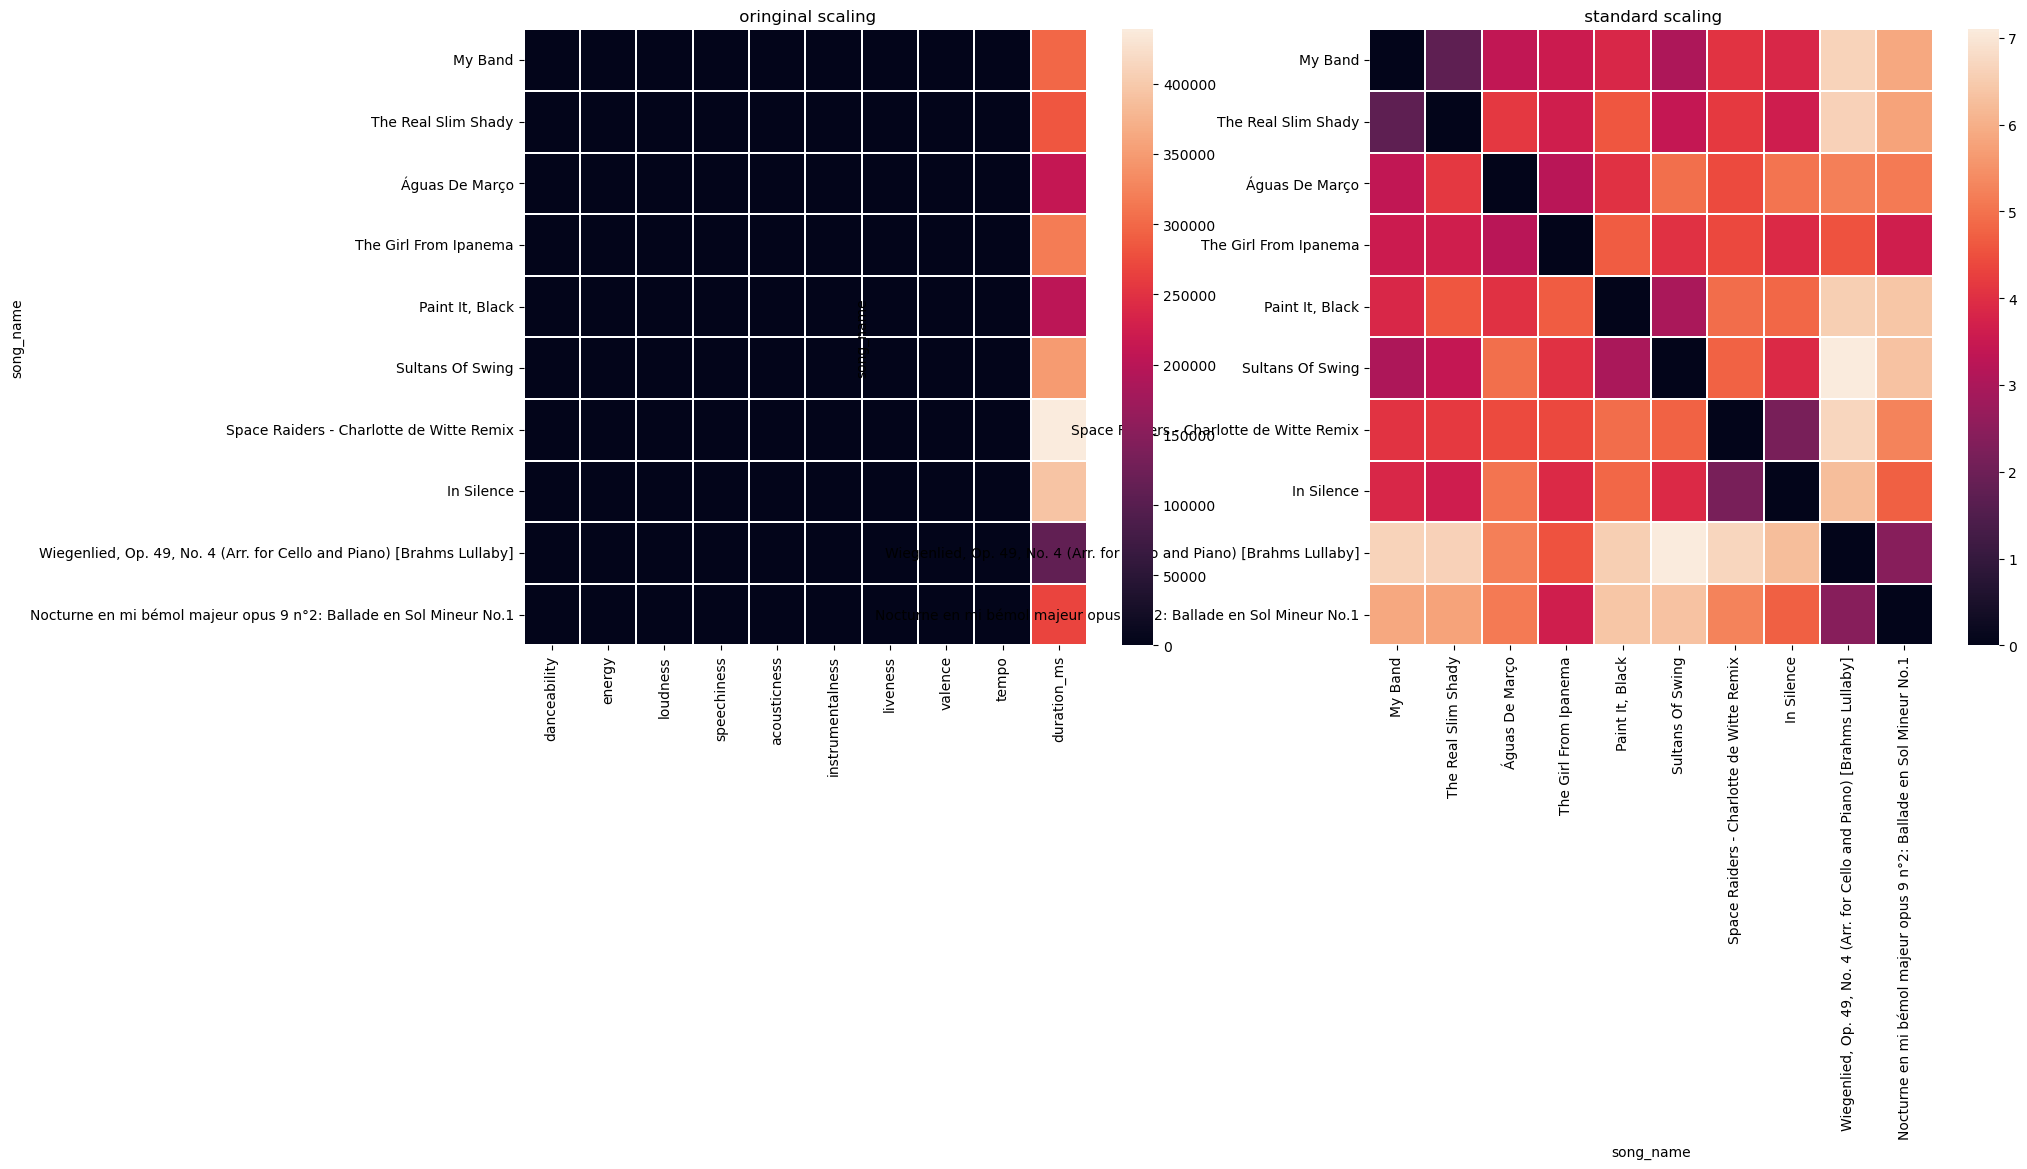

In [52]:
# # Making the DataFrame for the standard heatmap
# standard_distances = pd.DataFrame(pairwise_distances(standard_df), index=df_10.index, columns=df_10.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_10, ax=ax1, linewidths=.2);
# sns.heatmap(standard_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title(' oringinal scaling')
# ax2.set_title(' standard scaling')

# plt.show()

# Robust scaler
All of the columns get scaled between their interquartile ranges. The lowest value of the column equals the first quartile, the highest value of the column equals the third quartile, and all other values get scaled in between. In addition to this the data gets centered around 0 as the median. This means that the median becomes 0 and, therefore, all values less than the median will be negative, and all values higher than the median will be positive.

newValue=oldValue−median(column)IQR(column)


In [13]:
# Import Robust Scaler
from sklearn.preprocessing import RobustScaler

# Create DataFrame of Robust scaled values
my_scaler = RobustScaler().set_output(transform='pandas')
robust_df = my_scaler.fit_transform(df_1000)

# Display age column of original DataFrame and age column of Robust DataFrame to compare
pd.DataFrame({
    'original': df_1000.iloc[:,1], 
    'robust_scale': robust_df.iloc[:,1]
}).sort_values(by='original')

original  robust_scale
title                                                                     
Track3a (2waynice) - Keith Fullerton Whitman        0.000020     -1.080571
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...  0.000930     -1.078714
Photo With Grey Sky, White Clouds - Jonny Nash      0.000985     -1.078602
The Unanswered Question - Charles Ives              0.001080     -1.078408
The Unquestioned Answer - Laurie Spiegel            0.001340     -1.077878
...                                                      ...           ...
Raining Blood - Slayer                              0.995000      0.950000
Barcelona (In the Style of D Kay & Epsilon & St...  0.995000      0.950000
L'enfant sauvage - Gojira                           0.995000      0.950000
Wait and Bleed - Slipknot                           0.996000      0.952041
Under and Over It - Five Finger Death Punch         0.996000      0.952041

[1440 rows x 2 columns]

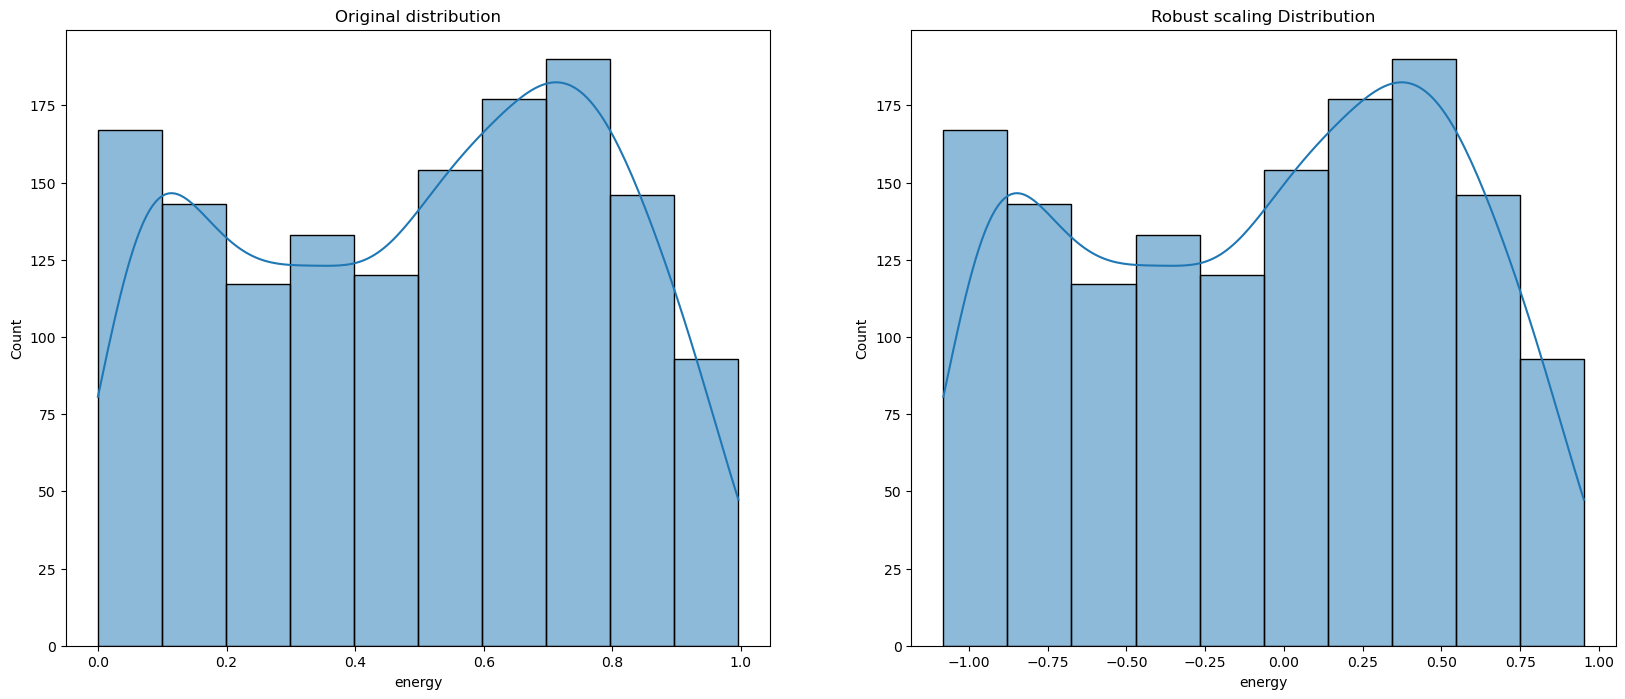

In [15]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_1000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(robust_df.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('Robust scaling Distribution')

plt.show()

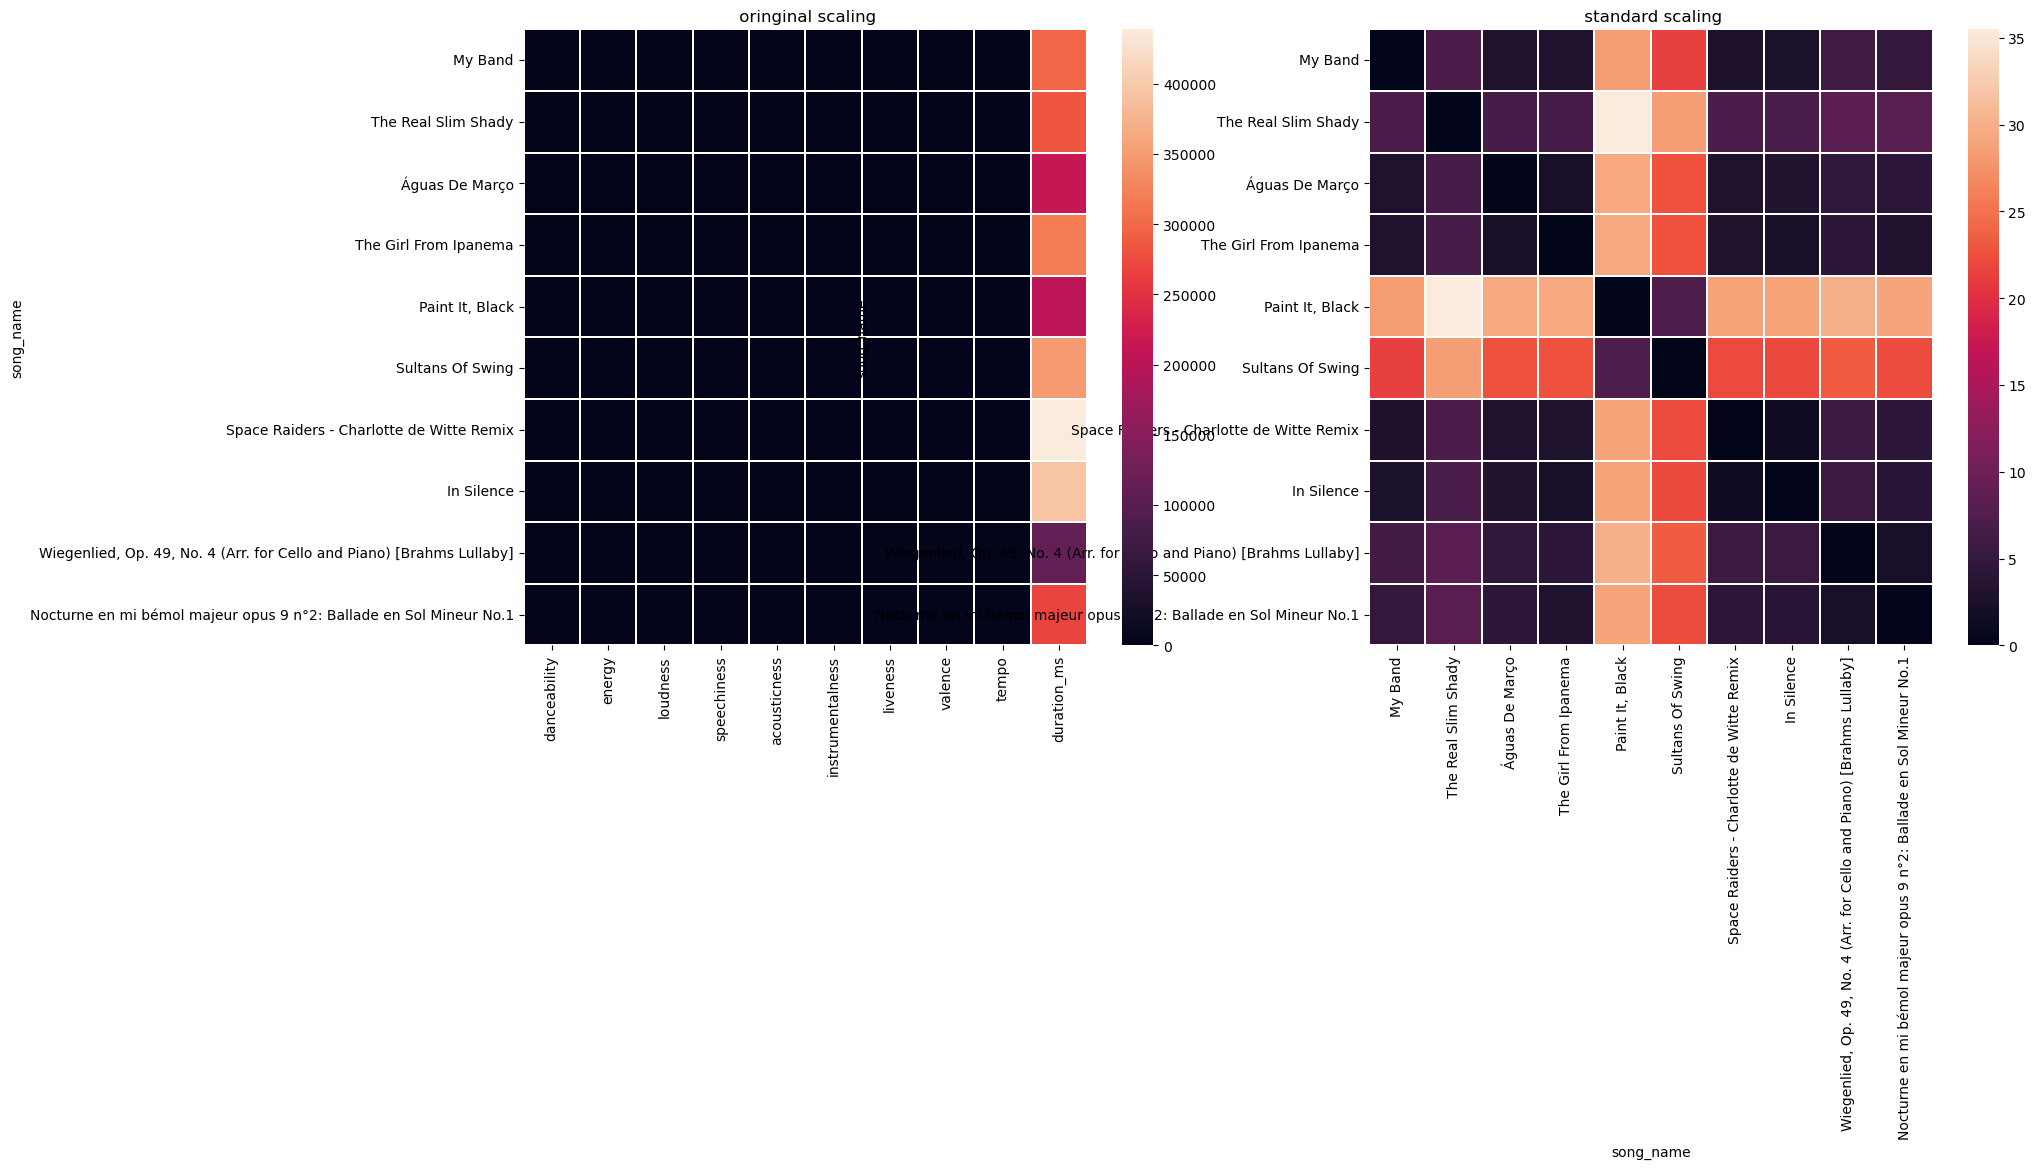

In [58]:
# # Making the DataFrame for the robust heatmap
# robust_distances = pd.DataFrame(pairwise_distances(robust_df), index=df_10.index, columns=df_10.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_10, ax=ax1, linewidths=.2);
# sns.heatmap(robust_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title(' oringinal scaling')
# ax2.set_title(' standard scaling')

# plt.show()

Transformers
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. The assumption that the distribution is normal is explicitly used in the calculations for models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

Quantile transformer
All of the columns get scaled according to their quantile.

Note: Quantiles are divisions of the data, which tell us how much of the data is present below this point. For example, the median is the middle of the data, this is therefore a quantile of 0.5, half of the data exists at or below this point. By the same measure, 78% of the data exists at or below the quantile 0.78.

In [16]:
# Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# Create DataFrame of Quantile transformed values
my_transformer = QuantileTransformer(n_quantiles=len(df_1000.iloc[:,-1])).set_output(transform='pandas')
quantile_df = my_transformer.fit_transform(df_1000)

# Display age column of original DataFrame and age column of Quantile DataFrame to compare
pd.DataFrame({
    'original': df_1000.iloc[:,-1], 
    'quantile_transformed': quantile_df.iloc[:,-1],
    'min_max_scale': min_max_df.iloc[:,-1]
}).sort_values(by='original')

original  \
title                                                          
I Got It Bad And That Ain't Good - Oscar Peters...    49.689   
What's The Rush - Johnny Hodges                       51.059   
Lazy Afternoon - Joe Henderson                        52.789   
He's Younger Than You Are - From "Alfie" Score ...    57.312   
EXPO - Magnus Lindberg                                58.339   
...                                                      ...   
Party Up - DMX                                       201.936   
Undercurrent - Windy & Carl                          202.983   
What's Going On - Marvin Gaye                        203.206   
Ready Teddy - Little Richard                         205.973   
Rebel Rouser - Duane Eddy                            206.313   

                                                    quantile_transformed  \
title                                                                      
I Got It Bad And That Ain't Good - Oscar Peters...              0.000000   
What's The Rush - Johnny Hodges                                 0.000695   
Lazy Afternoon - Joe Henderson                                  0.001390   
He's Younger Than You Are - From "Alfie" Score ...              0.002085   
EXPO - Magnus Lindberg                                          0.002780   
...                                                                  ...   
Party Up - DMX                                                  0.997220   
Undercurrent - Windy & Carl                                     0.997915   
What's Going On - Marvin Gaye                                   0.998610   
Ready Teddy - Little Richard                                    0.999305   
Rebel Rouser - Duane Eddy                                       1.000000   

                                                    min_max_scale  
title                                                              
I Got It Bad And That Ain't Good - Oscar Peters...       0.000000  
What's The Rush - Johnny Hodges                          0.008747  
Lazy Afternoon - Joe Henderson                           0.019793  
He's Younger Than You Are - From "Alfie" Score ...       0.048671  
EXPO - Magnus Lindberg                                   0.055228  
...                                                           ...  
Party Up - DMX                                           0.972054  
Undercurrent - Windy & Carl                              0.978739  
What's Going On - Marvin Gaye                            0.980163  
Ready Teddy - Little Richard                             0.997829  
Rebel Rouser - Duane Eddy                                1.000000  

[1440 rows x 3 columns]

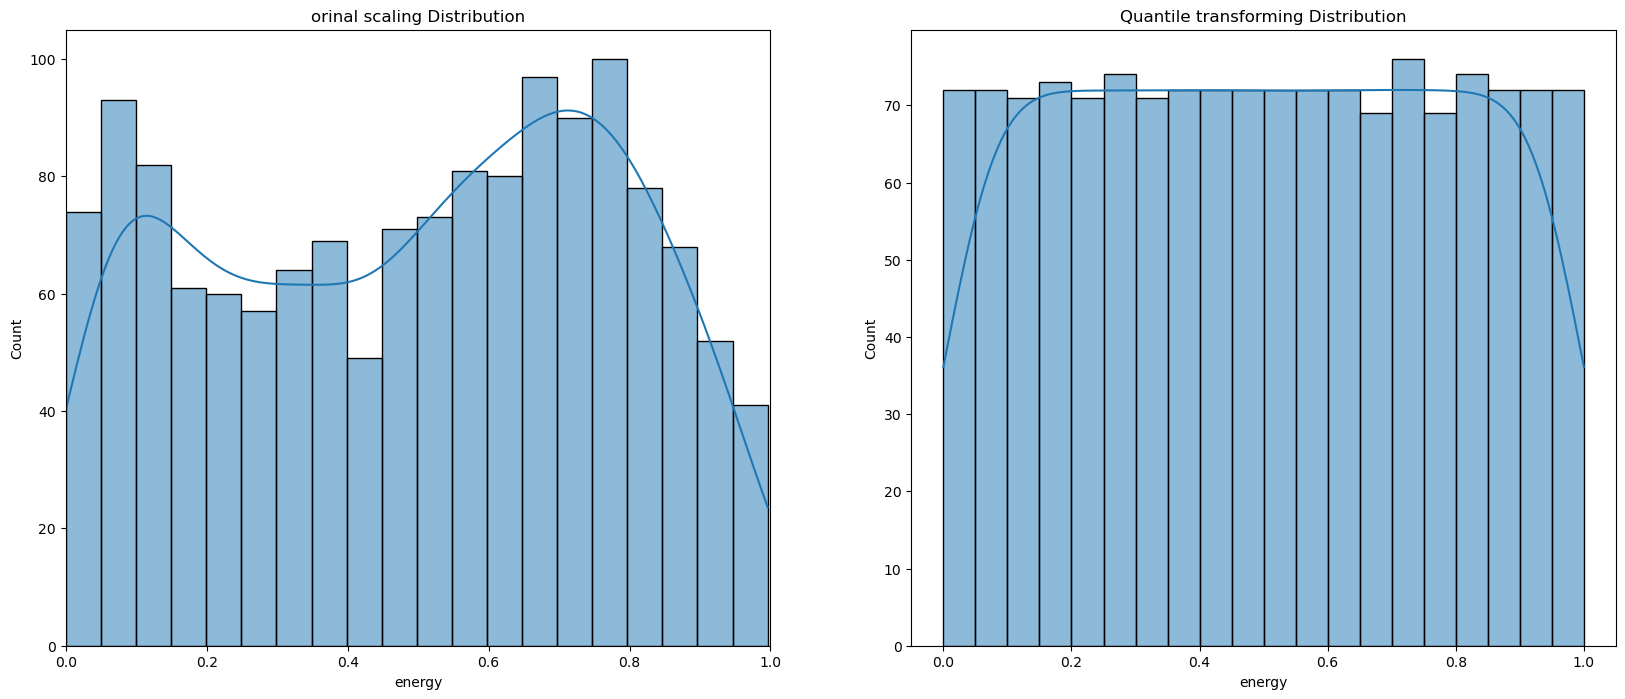

In [17]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_1000.iloc[:,1], bins=20, kde=True, ax=ax1);
ax1.set_xlim([0,1])
sns.histplot(quantile_df.iloc[:,1], bins=20, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('orinal scaling Distribution')
ax2.set_title('Quantile transforming Distribution')

plt.show()

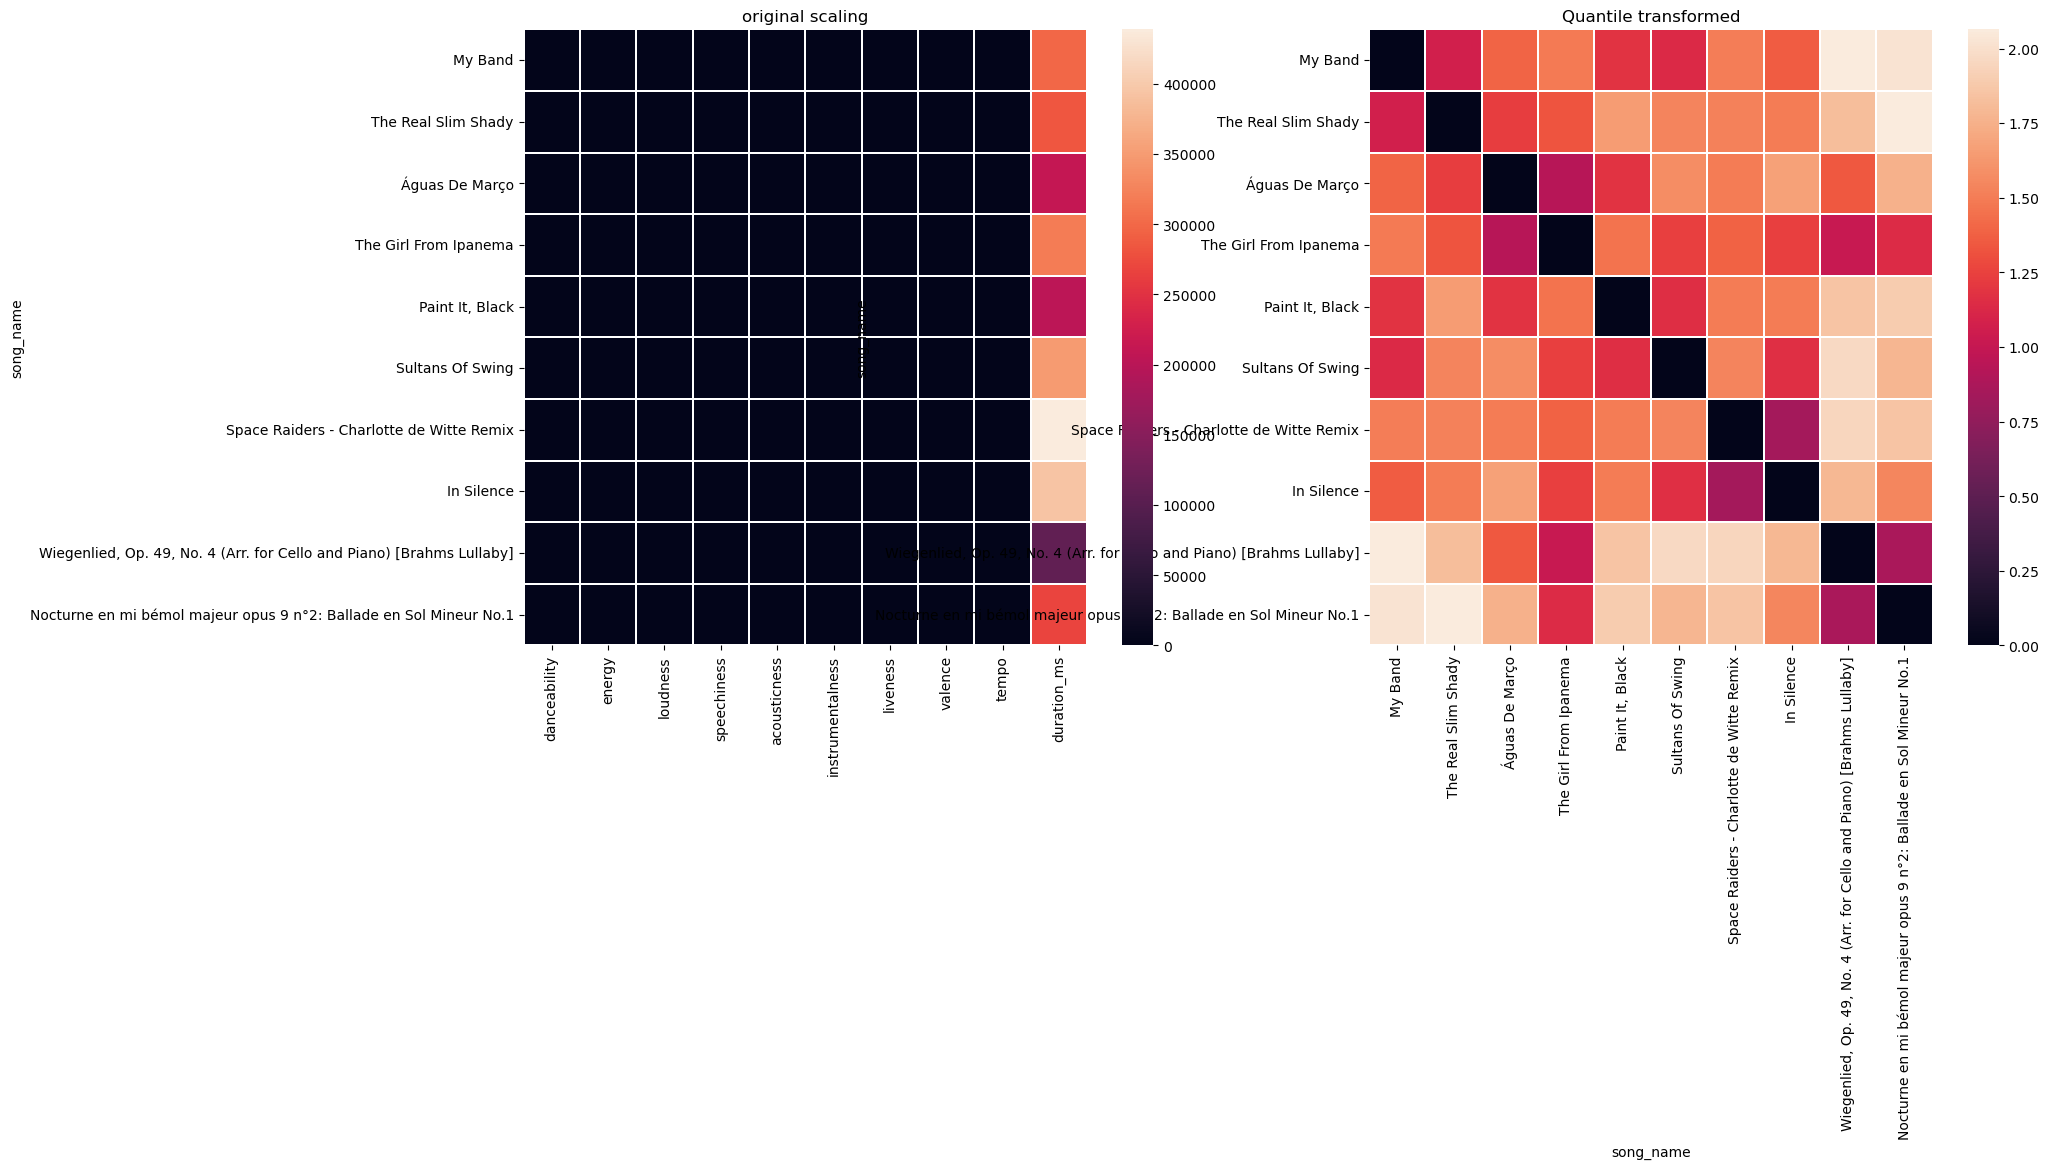

In [70]:
# # Making the DataFrame for the Quantile heatmap
# quantile_distances = pd.DataFrame(pairwise_distances(quantile_df), index=df_10.index, columns=df_10.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_10, ax=ax1, linewidths=.2);
# sns.heatmap(quantile_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title('original scaling')
# ax2.set_title('Quantile transformed')

# plt.show()